# Part A

## Initialization

In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time

In [2]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [4]:
downloaded = drive.CreateFile({'id':"1Pc9ZyLyUkJwv80FGAVntABx4FbJXTA1q"})   # replace the id with id of file you want to access
downloaded.GetContentFile('ctg_data_cleaned.csv')        # replace the file name with your file

In [5]:
#Set Variables
NUM_CLASSES = 3

epochs = 5000
batch_size = 32
num_neurons = 10
seed = 10

#Arrays of parameters
batches = [4, 8, 16, 32, 64]
hiddenNeurons = [5,10,15,20,25]
decays = [0,10**(-3),10**(-6),10**(-9),10**(-12)]

np.random.seed(seed)
tf.random.set_seed(seed)

histories = {}
timeTaken = {}

In [6]:
#Additional Variables
learningRate = 0.01 #As defined in the assignment
decay = 0.000001 #As defined in the assignment

#Set learning rate
opt = tf.keras.optimizers.SGD(learning_rate=learningRate)

In [7]:
#Defining Functions

# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

def train_ffn_model(trainX, trainY, testX, testY, no_epochs, batchs, no_neurons, dcay, no_folds, datasize):
    #Initialize results
    results = {}
    acc = []
    nf = datasize//no_folds
    #Look for number of folds
    for fold in range(no_folds):
      start, end = fold*nf, (fold+1)*nf
      x_test, y_test = testX[start:end], testY[start:end]
      x_train  = np.append(trainX[:start], trainX[end:], axis=0)
      y_train = np.append(trainY[:start], trainY[end:], axis=0) 
      # create the model
      ffn_model = keras.Sequential([
          keras.layers.Dense(no_neurons, activation='relu'),
          keras.layers.Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(decay))
      ])

      ffn_model.compile(optimizer='sgd',
                    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
      #Fit the FFN model
      results[fold] = ffn_model.fit(trainX, trainY, 
                    epochs=no_epochs, 
                    batch_size=batchs, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
      acc.append(results[fold].history['val_accuracy'][no_epochs-1])
    #Print fold - accuracy
    for fold in range(no_folds):
      print('fold %d test accuracy %g'%(fold, acc[fold]))
    return results

In [8]:

#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
trainX, train_Y = train_input[1:, :21], train_input[1:,-1].astype(int)
trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
trainY = train_Y-1
trainX,testX,trainY,testY=train_test_split(trainX, trainY,
train_size=0.7,
test_size=0.3)

#Save size of data
data_size = len(train_input)

#Check shape of test and train set
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(len(train_input))

(1488, 21)
(1488,)
(638, 21)
(638,)
2127


## Q1 Training Default Model

In [ ]:
# Training results with batch size 32, decay 10**(-6) and 10 number of neurons for hidden layer
trained_results = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, num_neurons, decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 2504/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2505/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2506/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2507/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2508/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2509/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2510/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2511/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2512/5000
47/47 - 0s - loss: 0.7238 - accuracy: 0.8300 - val_loss: 0.7339 - val_accuracy: 0.8182
Epoch 2513/5000
47/47 

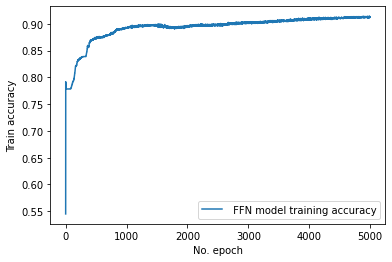

In [ ]:
# Plot the Learning Curve
plt.plot(trained_results[3].history['accuracy'], label=' FFN model training accuracy')
plt.ylabel('Train accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [9]:
#Epochs where accuracy converges
epochs = 1500

## Q2 Finding Optimal Batch Size



Batch Size 4

In [ ]:
# When Choosing Batch Size = 4
batch_4 = train_ffn_model(trainX, trainY, testX, testY, epochs, batches[0], num_neurons, decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
372/372 - 0s - loss: 0.7078 - accuracy: 0.8448 - val_loss: 0.7114 - val_accuracy: 0.8401
Epoch 505/1500
372/372 - 0s - loss: 0.7077 - accuracy: 0.8454 - val_loss: 0.7114 - val_accuracy: 0.8386
Epoch 506/1500
372/372 - 0s - loss: 0.7075 - accuracy: 0.8441 - val_loss: 0.7116 - val_accuracy: 0.8386
Epoch 507/1500
372/372 - 0s - loss: 0.7074 - accuracy: 0.8461 - val_loss: 0.7115 - val_accuracy: 0.8386
Epoch 508/1500
372/372 - 0s - loss: 0.7073 - accuracy: 0.8461 - val_loss: 0.7112 - val_accuracy: 0.8401
Epoch 509/1500
372/372 - 0s - loss: 0.7071 - accuracy: 0.8454 - val_loss: 0.7113 - val_accuracy: 0.8386
Epoch 510/1500
372/372 - 0s - loss: 0.7070 - accuracy: 0.8461 - val_loss: 0.7110 - val_accuracy: 0.8417
Epoch 511/1500
372/372 - 0s - loss: 0.7066 - accuracy: 0.8454 - val_loss: 0.7120 - val_accuracy: 0.8401
Epoch 512/1500
372/372 - 0s - loss: 0.7068 - accuracy: 0.8461 - val_loss: 0.7115 - val_accuracy: 0.8386
Epoch 513/150

Batch Size 8

In [ ]:
# When Choosing Batch Size = 8
batch_8 = train_ffn_model(trainX, trainY, testX, testY, epochs, batches[1], num_neurons, decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 505/1500
186/186 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 506/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 507/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 508/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 509/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 510/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 511/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 512/1500
186/186 - 0s - loss: 0.7732 - accuracy: 0.7782 - val_loss: 0.7725 - val_accuracy: 0.7790
Epoch 513/150

Batch Size 16

In [ ]:
# When Choosing Batch Size = 16
batch_16 = train_ffn_model(trainX, trainY, testX, testY, epochs, batches[2], num_neurons, decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
93/93 - 0s - loss: 0.6670 - accuracy: 0.8925 - val_loss: 0.6632 - val_accuracy: 0.8918
Epoch 505/1500
93/93 - 0s - loss: 0.6670 - accuracy: 0.8925 - val_loss: 0.6632 - val_accuracy: 0.8918
Epoch 506/1500
93/93 - 0s - loss: 0.6669 - accuracy: 0.8918 - val_loss: 0.6630 - val_accuracy: 0.8903
Epoch 507/1500
93/93 - 0s - loss: 0.6669 - accuracy: 0.8918 - val_loss: 0.6629 - val_accuracy: 0.8903
Epoch 508/1500
93/93 - 0s - loss: 0.6668 - accuracy: 0.8918 - val_loss: 0.6630 - val_accuracy: 0.8918
Epoch 509/1500
93/93 - 0s - loss: 0.6668 - accuracy: 0.8925 - val_loss: 0.6629 - val_accuracy: 0.8903
Epoch 510/1500
93/93 - 0s - loss: 0.6667 - accuracy: 0.8925 - val_loss: 0.6630 - val_accuracy: 0.8918
Epoch 511/1500
93/93 - 0s - loss: 0.6667 - accuracy: 0.8925 - val_loss: 0.6628 - val_accuracy: 0.8903
Epoch 512/1500
93/93 - 0s - loss: 0.6666 - accuracy: 0.8925 - val_loss: 0.6626 - val_accuracy: 0.8918
Epoch 513/1500
93/93 - 0s - los

Batch Size 32

In [ ]:
# When Choosing Batch Size = 32
batch_32 = train_ffn_model(trainX, trainY, testX, testY, epochs, batches[3], num_neurons, decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7710 - accuracy: 0.7782 - val_loss: 0.7696 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7709 - accuracy: 0.7782 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7709 - accuracy: 0.7782 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7709 - accuracy: 0.7782 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7709 - accuracy: 0.7782 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7708 - accuracy: 0.7782 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7708 - accuracy: 0.7782 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7708 - accuracy: 0.7782 - val_loss: 0.7694 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7708 - accuracy: 0.7782 - val_loss: 0.7694 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [ ]:
# When Choosing Batch Size = 64
batch_64 = train_ffn_model(trainX, trainY, testX, testY, epochs, batches[4], num_neurons, decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 505/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 506/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 507/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 508/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 509/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 510/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 511/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 512/1500
24/24 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 513/1500
24/24 - 0s - los

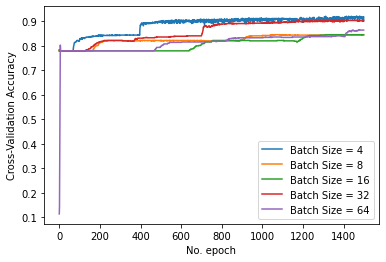

In [ ]:
# Plot all Learning Curves for Batch Size
plt.plot(batch_4[1].history['val_accuracy'], label='Batch Size = 4')
plt.plot(batch_8[0].history['val_accuracy'], label='Batch Size = 8')
plt.plot(batch_16[2].history['val_accuracy'], label='Batch Size = 16')
plt.plot(batch_32[2].history['val_accuracy'], label='Batch Size = 32')
plt.plot(batch_64[2].history['val_accuracy'], label='Batch Size = 64')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 4
histories['batch_4_1'] = train_ffn_model(trainX, trainY, testX, testY, 1, batches[0], num_neurons, decay, 5, data_size)
#Store time taken
timeTaken[4] = time.process_time() - start

372/372 - 0s - loss: 0.9343 - accuracy: 0.7392 - val_loss: 0.8194 - val_accuracy: 0.7790
372/372 - 0s - loss: 0.8837 - accuracy: 0.7749 - val_loss: 0.7973 - val_accuracy: 0.7790
372/372 - 1s - loss: 0.8599 - accuracy: 0.7782 - val_loss: 0.7992 - val_accuracy: 0.7790
372/372 - 0s - loss: 0.8561 - accuracy: 0.7769 - val_loss: 0.7972 - val_accuracy: 0.7790
372/372 - 0s - loss: 0.9590 - accuracy: 0.6539 - val_loss: 0.8277 - val_accuracy: 0.7790
fold 0 test accuracy 0.778997
fold 1 test accuracy 0.778997
fold 2 test accuracy 0.778997
fold 3 test accuracy 0.778997
fold 4 test accuracy 0.778997


In [ ]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 8
histories['batch_8_1'] = train_ffn_model(trainX, trainY, testX, testY, 1, batches[1], num_neurons, decay, 5, data_size)
#Store time taken
timeTaken[8] = time.process_time() - start

186/186 - 0s - loss: 1.0300 - accuracy: 0.7527 - val_loss: 0.9577 - val_accuracy: 0.7790
186/186 - 0s - loss: 0.8932 - accuracy: 0.7776 - val_loss: 0.8286 - val_accuracy: 0.7790
186/186 - 0s - loss: 0.9560 - accuracy: 0.7769 - val_loss: 0.8630 - val_accuracy: 0.7790
186/186 - 0s - loss: 0.9964 - accuracy: 0.7177 - val_loss: 0.9088 - val_accuracy: 0.7790
186/186 - 0s - loss: 0.9381 - accuracy: 0.7762 - val_loss: 0.8590 - val_accuracy: 0.7790
fold 0 test accuracy 0.778997
fold 1 test accuracy 0.778997
fold 2 test accuracy 0.778997
fold 3 test accuracy 0.778997
fold 4 test accuracy 0.778997


In [ ]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 16
histories['batch_16_1'] = train_ffn_model(trainX, trainY, testX, testY, 1, batches[2], num_neurons, decay, 5, data_size)
#Store time taken
#Store time taken
timeTaken[16] = time.process_time() - start

93/93 - 0s - loss: 1.0524 - accuracy: 0.6841 - val_loss: 1.0003 - val_accuracy: 0.7790
93/93 - 0s - loss: 1.0706 - accuracy: 0.5121 - val_loss: 1.0137 - val_accuracy: 0.7712
93/93 - 0s - loss: 1.0913 - accuracy: 0.4375 - val_loss: 1.0652 - val_accuracy: 0.7398
93/93 - 0s - loss: 1.0312 - accuracy: 0.6593 - val_loss: 0.9854 - val_accuracy: 0.7790
93/93 - 0s - loss: 0.9272 - accuracy: 0.7782 - val_loss: 0.8816 - val_accuracy: 0.7790
fold 0 test accuracy 0.778997
fold 1 test accuracy 0.77116
fold 2 test accuracy 0.739812
fold 3 test accuracy 0.778997
fold 4 test accuracy 0.778997


In [ ]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 32
histories['batch_32_1'] = train_ffn_model(trainX, trainY, testX, testY, 1, batches[3], num_neurons, decay, 5, data_size)
#Store time taken
timeTaken[32] = time.process_time() - start

47/47 - 0s - loss: 1.0024 - accuracy: 0.7769 - val_loss: 0.9603 - val_accuracy: 0.7806
47/47 - 0s - loss: 0.9407 - accuracy: 0.7776 - val_loss: 0.9035 - val_accuracy: 0.7790
47/47 - 0s - loss: 0.9953 - accuracy: 0.7849 - val_loss: 0.9564 - val_accuracy: 0.7806
47/47 - 0s - loss: 1.1586 - accuracy: 0.0853 - val_loss: 1.1325 - val_accuracy: 0.0815
47/47 - 0s - loss: 1.1696 - accuracy: 0.1169 - val_loss: 1.1493 - val_accuracy: 0.1238
fold 0 test accuracy 0.780564
fold 1 test accuracy 0.778997
fold 2 test accuracy 0.780564
fold 3 test accuracy 0.0815047
fold 4 test accuracy 0.123824


In [ ]:
#For 1 epoch

#Initialize start time
start = time.process_time()
#Fit the FFN model for batch size 64
histories['batch_64_1'] = train_ffn_model(trainX, trainY, testX, testY, 1, batches[4], num_neurons, decay, 5, data_size)
#Store time taken
timeTaken[64] = time.process_time() - start
print(timeTaken[64])

24/24 - 0s - loss: 1.1062 - accuracy: 0.1915 - val_loss: 1.0937 - val_accuracy: 0.3229
24/24 - 0s - loss: 1.0588 - accuracy: 0.6223 - val_loss: 1.0317 - val_accuracy: 0.7445
24/24 - 0s - loss: 1.1091 - accuracy: 0.1512 - val_loss: 1.0967 - val_accuracy: 0.1552
24/24 - 0s - loss: 1.1563 - accuracy: 0.0874 - val_loss: 1.1475 - val_accuracy: 0.0752
24/24 - 0s - loss: 1.0586 - accuracy: 0.6425 - val_loss: 1.0402 - val_accuracy: 0.7586
fold 0 test accuracy 0.322884
fold 1 test accuracy 0.744514
fold 2 test accuracy 0.155172
fold 3 test accuracy 0.0752351
fold 4 test accuracy 0.758621
2.23512203700011


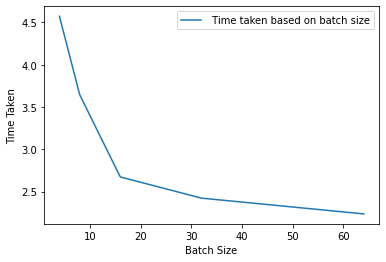

In [ ]:
time = [timeTaken[4],timeTaken[8],timeTaken[16],timeTaken[32],timeTaken[64]]

#plot batch size again time taken
plt.plot(batches, time, label=' Time taken based on batch size')
plt.ylabel('Time Taken')
plt.xlabel('Batch Size')
plt.legend(loc="upper right")
plt.show()

In [10]:
#Select 32 as the optimal batch size
batch_size = 32

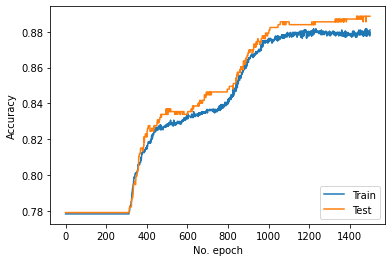

In [ ]:
plt.plot(batch_32[2].history['accuracy'], label='Train')
plt.plot(batch_32[2].history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

# Q3 Find optimal number of neurons for hidden layer

In [ ]:
#Fit the FFN model for number of neurons 5
histories['hidden_5'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, hiddenNeurons[0], decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7735 - accuracy: 0.7782 - val_loss: 0.7727 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [ ]:
#Fit the FFN model for number of neurons 10
histories['hidden_10'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, hiddenNeurons[1], decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7728 - accuracy: 0.7782 - val_loss: 0.7718 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [ ]:
#Fit the FFN model for number of neurons 15
histories['hidden_15'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, hiddenNeurons[2], decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [ ]:
#Fit the FFN model for number of neurons 20
histories['hidden_20'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, hiddenNeurons[3], decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [ ]:
#Fit the FFN model for number of neurons 25
histories['hidden_25'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, hiddenNeurons[4], decay, 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

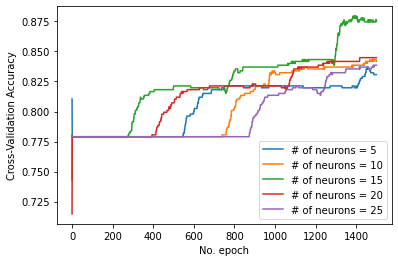

In [ ]:
# Plot all Learning Curves for Optimal Number of neurons
plt.plot(histories["hidden_5"][1].history['val_accuracy'], label='# of neurons = 5')
plt.plot(histories["hidden_10"][3].history['val_accuracy'], label='# of neurons = 10')
plt.plot(histories["hidden_15"][0].history['val_accuracy'], label='# of neurons = 15')
plt.plot(histories["hidden_20"][4].history['val_accuracy'], label='# of neurons = 20')
plt.plot(histories["hidden_25"][2].history['val_accuracy'], label='# of neurons = 25')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [11]:
#Optimal Number of neurons
num_neurons = 15

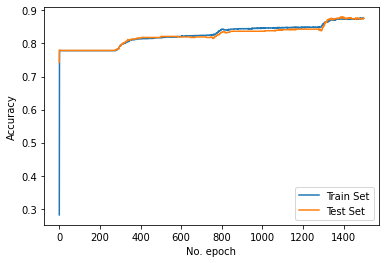

In [ ]:
#Plot train test
plt.plot(histories["hidden_15"][0].history['accuracy'], label='Train Set')
plt.plot(histories["hidden_15"][0].history['val_accuracy'], label='Test Set')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Q4 Finding Optimal Decay

In [12]:
#Fit the FFN model for decay 0
histories['decay_0'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, num_neurons, decays[0], 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7693 - accuracy: 0.7782 - val_loss: 0.7689 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7692 - accuracy: 0.7782 - val_loss: 0.7688 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7691 - accuracy: 0.7782 - val_loss: 0.7687 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7690 - accuracy: 0.7782 - val_loss: 0.7686 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7689 - accuracy: 0.7782 - val_loss: 0.7685 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7688 - accuracy: 0.7782 - val_loss: 0.7684 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7686 - accuracy: 0.7782 - val_loss: 0.7683 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7685 - accuracy: 0.7782 - val_loss: 0.7681 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7684 - accuracy: 0.7782 - val_loss: 0.7680 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [13]:
#Fit the FFN model for decay 3
histories['decay_3'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, num_neurons, decays[1], 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7733 - accuracy: 0.7782 - val_loss: 0.7724 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [14]:
#Fit the FFN model for decay 6
histories['decay_6'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, num_neurons, decays[2], 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

In [16]:
#Fit the FFN model for decay 9
histories['decay_9'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, num_neurons, decays[3], 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7370 - accuracy: 0.8172 - val_loss: 0.7405 - val_accuracy: 0.8213
Epoch 505/1500
47/47 - 0s - loss: 0.7370 - accuracy: 0.8172 - val_loss: 0.7405 - val_accuracy: 0.8213
Epoch 506/1500
47/47 - 0s - loss: 0.7369 - accuracy: 0.8172 - val_loss: 0.7404 - val_accuracy: 0.8213
Epoch 507/1500
47/47 - 0s - loss: 0.7369 - accuracy: 0.8172 - val_loss: 0.7404 - val_accuracy: 0.8213
Epoch 508/1500
47/47 - 0s - loss: 0.7368 - accuracy: 0.8172 - val_loss: 0.7404 - val_accuracy: 0.8213
Epoch 509/1500
47/47 - 0s - loss: 0.7368 - accuracy: 0.8179 - val_loss: 0.7403 - val_accuracy: 0.8213
Epoch 510/1500
47/47 - 0s - loss: 0.7368 - accuracy: 0.8185 - val_loss: 0.7403 - val_accuracy: 0.8213
Epoch 511/1500
47/47 - 0s - loss: 0.7367 - accuracy: 0.8185 - val_loss: 0.7402 - val_accuracy: 0.8213
Epoch 512/1500
47/47 - 0s - loss: 0.7367 - accuracy: 0.8185 - val_loss: 0.7402 - val_accuracy: 0.8213
Epoch 513/1500
47/47 - 0s - los

In [15]:
#Fit the FFN model for decay 12
histories['decay_12'] = train_ffn_model(trainX, trainY, testX, testY, epochs, batch_size, num_neurons, decays[4], 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 505/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 506/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 507/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 508/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 509/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 510/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 511/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 512/1500
47/47 - 0s - loss: 0.7734 - accuracy: 0.7782 - val_loss: 0.7726 - val_accuracy: 0.7790
Epoch 513/1500
47/47 - 0s - los

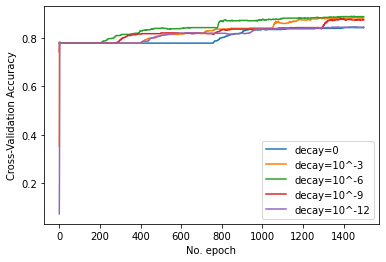

In [17]:
# Plot all Learning Curves
#Plot Decays
plt.plot(histories['decay_0'][2].history['val_accuracy'], label='decay=0')
plt.plot(histories['decay_3'][2].history['val_accuracy'], label='decay=10^-3')
plt.plot(histories['decay_6'][0].history['val_accuracy'], label='decay=10^-6')
plt.plot(histories['decay_9'][3].history['val_accuracy'], label='decay=10^-9')
plt.plot(histories['decay_12'][1].history['val_accuracy'], label='decay=10^-12')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [18]:
#Optimal Decay Parameter
decay=10**(-6)

In [22]:
#Save Optimal three layers model
histories['three_layers']= histories['decay_6'][0]

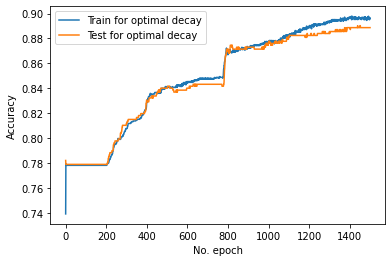

In [23]:
#Plot test and train for optimal decay
plt.plot(histories['three_layers'].history['accuracy'], label='Train for optimal decay')
plt.plot(histories['three_layers'].history['val_accuracy'], label='Test for optimal decay')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

## Q5 Comparing 4 and 3 Layers

In [20]:
def four_layers_model(trainX, trainY, testX, testY, no_epochs, batchs, no_neurons, dcay, no_folds, datasize):
    #Initialize results
    results = {}
    acc = []
    nf = datasize//no_folds
    #Look for number of folds
    for fold in range(no_folds):
      start, end = fold*nf, (fold+1)*nf
      x_test, y_test = testX[start:end], testY[start:end]
      x_train  = np.append(trainX[:start], trainX[end:], axis=0)
      y_train = np.append(trainY[:start], trainY[end:], axis=0) 
      # create the model
      ffn_model = keras.Sequential([
          keras.layers.Dense(no_neurons, activation='relu'),
          keras.layers.Dense(no_neurons, activation='relu'),
          keras.layers.Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(decay))
      ])

      ffn_model.compile(optimizer='sgd',
                    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
      #Fit the FFN model
      results[fold] = ffn_model.fit(trainX, trainY, 
                    epochs=no_epochs, 
                    batch_size=batchs, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(testX, testY))
      acc.append(results[fold].history['val_accuracy'][no_epochs-1])
    #Print fold - accuracy
    for fold in range(no_folds):
      print('fold %d test accuracy %g'%(fold, acc[fold]))
    return results

In [21]:
#Fit network for four layers
histories['four_layers'] = four_layers_model(trainX, trainY, testX, testY, epochs, 32, 10, 10**(-6), 5, data_size)

Streaming output truncated to the last 5000 lines.
Epoch 504/1500
47/47 - 0s - loss: 0.6807 - accuracy: 0.8797 - val_loss: 0.6778 - val_accuracy: 0.8871
Epoch 505/1500
47/47 - 0s - loss: 0.6807 - accuracy: 0.8804 - val_loss: 0.6776 - val_accuracy: 0.8871
Epoch 506/1500
47/47 - 0s - loss: 0.6805 - accuracy: 0.8784 - val_loss: 0.6771 - val_accuracy: 0.8824
Epoch 507/1500
47/47 - 0s - loss: 0.6804 - accuracy: 0.8804 - val_loss: 0.6767 - val_accuracy: 0.8809
Epoch 508/1500
47/47 - 0s - loss: 0.6804 - accuracy: 0.8790 - val_loss: 0.6771 - val_accuracy: 0.8856
Epoch 509/1500
47/47 - 0s - loss: 0.6800 - accuracy: 0.8797 - val_loss: 0.6768 - val_accuracy: 0.8824
Epoch 510/1500
47/47 - 0s - loss: 0.6799 - accuracy: 0.8763 - val_loss: 0.6771 - val_accuracy: 0.8840
Epoch 511/1500
47/47 - 0s - loss: 0.6800 - accuracy: 0.8797 - val_loss: 0.6766 - val_accuracy: 0.8840
Epoch 512/1500
47/47 - 0s - loss: 0.6797 - accuracy: 0.8824 - val_loss: 0.6762 - val_accuracy: 0.8809
Epoch 513/1500
47/47 - 0s - los

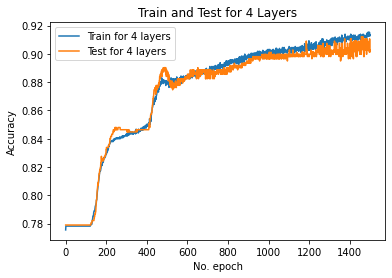

In [27]:
#Plot test and train for four layers
plt.title("Train and Test for 4 Layers")
plt.plot(histories['four_layers'][3].history['accuracy'], label='Train for 4 layers')
plt.plot(histories['four_layers'][3].history['val_accuracy'], label='Test for 4 layers')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()